# Build Dataset

## Data:

## 80824 imágenes en total sacado de los videos, 69163 tiene algunas anotaciones y los restos eliminados

In [1]:
from google.colab import drive
drive.mount('/content/drive', timeout_ms=1200000)

Mounted at /content/drive


## Import packages and functions

In [2]:
import os
import shutil
import json
import time
from shapely.geometry import Polygon
from typing import List, Dict

In [3]:
def copy_file(o_dir, d_dir, endswith, pref='', replace=True):
  # Itera sobre todos los archivos en el directorio de origen
  count = 0
  for archivo in os.listdir(o_dir):
    # Verifica si el archivo termina en 'endswith'
    if archivo.endswith(endswith):
      # Construye la ruta completa del archivo de origen
      ruta_completa_origen = os.path.join(o_dir, archivo)
      # Añade el prefijo al nombre del archivo para el destino
      if pref != '':
        nombre_destino = pref + '_' + archivo
      else:
        nombre_destino = archivo
      # Construye la ruta completa del archivo de destino
      ruta_completa_destino = os.path.join(d_dir, nombre_destino)

      # Mueve el archivo al directorio de destino con el nuevo nombre
      if replace is True or not os.path.exists(ruta_completa_destino):
        shutil.copy(ruta_completa_origen, ruta_completa_destino)
        count += 1

  print(f'Los {count} archivos en {o_dir} han sido procesados.')

In [4]:
def copy_json_file(o_dir, d_dir, endswith, pref=''):
  # Itera sobre todos los archivos en el directorio de origen
  if(endswith != 'json'):
    print('this function is only use for json files.')
  else:
    count = 0
    for archivo in os.listdir(o_dir):
      # Verifica si el archivo termina en 'endswith'
      if archivo.endswith(endswith):
        count += 1
        # Construye la ruta completa del archivo de origen
        ruta_completa_origen = os.path.join(o_dir, archivo)
        nombre_destino = pref + '_' + archivo

        # Construye la ruta completa del archivo de destino
        ruta_completa_destino = os.path.join(d_dir, nombre_destino)

        # Cambiar el imagePath al correspondiente y guardar en data
        with open(ruta_completa_origen, 'r', encoding='utf-8') as json_file:
          data = json.load(json_file)
          data['imagePath'] = pref + '_' + data['imagePath']

        # Escribir
        with open(ruta_completa_destino, 'w', encoding='utf-8') as json_file:
          json.dump(data, json_file, ensure_ascii=False, indent=4)
    print(f'Los {count} archivos en {o_dir} han sido procesados.')

In [5]:
def show_dataset():
  count = 0
  while count != -1:
    try:
      jpg_len = len([jpg_datas for jpg_datas in os.listdir('/content/drive/MyDrive/TFM_Xiao/Anotaciones/dataset') if jpg_datas.endswith('jpg')])
      json_len = len([json_datas for json_datas in os.listdir('/content/drive/MyDrive/TFM_Xiao/Anotaciones/dataset') if json_datas.endswith('json')])
      txt_len = len([txt_datas for txt_datas in os.listdir('/content/drive/MyDrive/TFM_Xiao/Anotaciones/dataset') if txt_datas.endswith('txt')])
      count = -1
    except Exception as e:
      count += 1
      print(count, ': ', e)
  print(f'\tHave {jpg_len} jpg files in dataset')
  print(f'\tHave {json_len} json files in dataset')
  print(f'\tHave {txt_len} txt files in dataset')
  print(f'\tHave total {jpg_len + json_len + txt_len} files in dataset')

In [ ]:
show_dataset()

	Have 79504 jpg files in dataset
	Have 69163 json files in dataset
	Have 67208 txt files in dataset
	Have total 215875 files in dataset


In [ ]:
show_dataset()

## Mover las imágenes al dataset

In [ ]:
show_dataset()

In [ ]:
list_origin_dir = ['/content/drive/MyDrive/TFM_Xiao/Videos/Agosto', '/content/drive/MyDrive/TFM_Xiao/Videos/Junio', '/content/drive/MyDrive/TFM_Xiao/Videos/Manolo', '/content/drive/MyDrive/TFM_Xiao/Videos/Otras', '/content/drive/MyDrive/TFM_Xiao/Videos/Septiembre', '/content/drive/MyDrive/TFM_Xiao/Videos/Lobo']
list_pref = ['Aug', 'Jun', 'Manolo', 'Otras', 'Sep', 'Lobo']
destination_dir = '/content/drive/MyDrive/TFM_Xiao/Anotaciones/dataset'
endswith = 'jpg'

for i, j in zip(list_origin_dir, list_pref):
  dirs = [name_dir for name_dir in os.listdir(i) if name_dir.endswith('correct')]
  for k in dirs:
    rute_complete_origin = os.path.join(i, k)
    #print(rute_complete_origin, destination_dir, endswith, j)
    copy_file(rute_complete_origin, destination_dir, endswith, j, replace = False)


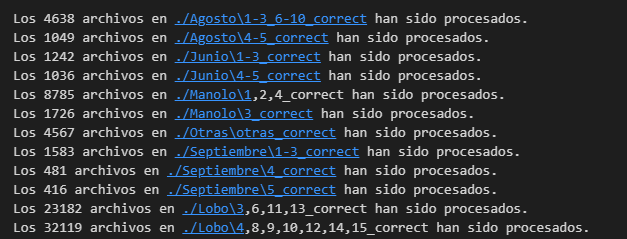

## Mover las etiquetas de formato COCO al dataset

In [ ]:
list_origin_dir = ['/content/drive/MyDrive/TFM_Xiao/Videos/Agosto', '/content/drive/MyDrive/TFM_Xiao/Videos/Junio', '/content/drive/MyDrive/TFM_Xiao/Videos/Manolo', '/content/drive/MyDrive/TFM_Xiao/Videos/Otras', '/content/drive/MyDrive/TFM_Xiao/Videos/Septiembre', '/content/drive/MyDrive/TFM_Xiao/Videos/Lobo']
list_pref = ['Aug', 'Jun', 'Manolo', 'Otras', 'Sep', 'Lobo']
destination_dir = '/content/drive/MyDrive/TFM_Xiao/Anotaciones/dataset'
endswith = 'json'

for i, j in zip(list_origin_dir, list_pref):
  dirs = [name_dir for name_dir in os.listdir(i) if name_dir.endswith('correct')]
  for k in dirs:
    rute_complete_origin = os.path.join(i, k)
    #print(rute_complete_origin, destination_dir, endswith, j)
    copy_json_file(rute_complete_origin, destination_dir, endswith, j)


Los 4570 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Agosto/1-3_6-10_correct han sido procesados.
Los 1049 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Agosto/4-5_correct han sido procesados.
Los 1036 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Junio/4-5_correct han sido procesados.
Los 1242 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Junio/1-3_correct han sido procesados.
Los 1726 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Manolo/3_correct han sido procesados.
Los 4399 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Otras/otras_correct han sido procesados.
Los 399 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Septiembre/5_correct han sido procesados.
Los 1583 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Septiembre/1-3_correct han sido procesados.
Los 481 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Septiembre/4_correct han sido procesados.
Los 26655 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Lobo/4,8,9,10,12,14,15_correct 

In [ ]:
copy_json_file('/content/drive/MyDrive/TFM_Xiao/Videos/Manolo/1,2,4_correct', '/content/drive/MyDrive/TFM_Xiao/Anotaciones/dataset', endswith = 'json', pref = 'Manolo')

Los 8785 archivos en /content/drive/MyDrive/TFM_Xiao/Videos/Manolo/1,2,4_correct han sido procesados.


## Mover las etiquetas de formato Yolo al dataset

In [ ]:
list_origin_dir = ['/content/drive/MyDrive/TFM_Xiao/Videos/Agosto/labels', '/content/drive/MyDrive/TFM_Xiao/Videos/Junio/labels', '/content/drive/MyDrive/TFM_Xiao/Videos/Manolo/labels', '/content/drive/MyDrive/TFM_Xiao/Videos/Otras/labels', '/content/drive/MyDrive/TFM_Xiao/Videos/Septiembre/labels', '/content/drive/MyDrive/TFM_Xiao/Videos/Lobo/labels']
destination_dir = '/content/drive/MyDrive/TFM_Xiao/Anotaciones/dataset'
list_pref = ['Aug', 'Jun', 'Manolo', 'Otras', 'Sep', 'Lobo']
endswith = 'txt'

for i, j in zip(list_origin_dir, list_pref):
  copy_file(i, destination_dir, endswith, j, replace=False)


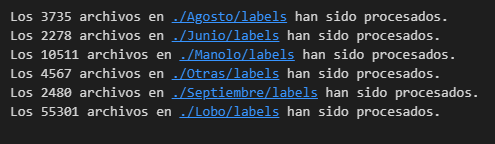

## Eliminar las imagenes y anotaciones de yolo vacías

In [ ]:
show_dataset()

# Establece el directorio donde se encuentran los archivos .txt y .jpg
directorio = '/content/drive/MyDrive/TFM_Xiao/Anotaciones/dataset'

# Crea una lista de rutas completas de los archivos .txt en el directorio especificado
datas_path = [os.path.join(directorio, txt_datas) for txt_datas in os.listdir(directorio) if txt_datas.endswith('txt')]

# Inicializa un contador para llevar la cuenta de los archivos eliminados
count = 0

# Itera sobre cada ruta de archivo .txt en la lista
for data_path in datas_path:
  # Verifica si el archivo .txt está vacío
  if os.stat(data_path).st_size == 0:
    # Elimina el archivo .txt
    os.remove(data_path)
    # Incrementa el contador para cada conjunto de archivos eliminados
    count += 1

# Imprime el número total de archivos eliminados, detallando tanto los archivos .jpg como los .txt
print(f'{count} txt files were removed')


In [ ]:
# Establece el directorio
directorio = '/content/drive/MyDrive/TFM_Xiao/Anotaciones/dataset'

# Crea una lista de rutas completas de los archivos jpg
datas_path = [os.path.join(directorio, txt_datas) for txt_datas in os.listdir(directorio) if txt_datas.endswith('jpg')]

# Inicializa un contador para llevar la cuenta de los archivos eliminados
count = 0

# Itera sobre cada ruta de archivo en la lista
for data_path in datas_path:
  # Extrae el nombre base del archivo (sin extensión)
  base_name = os.path.splitext(os.path.basename(data_path))[0]
  # Crea el nombre del archivo .json correspondiente
  json = base_name + '.json'
  # Crea la ruta completa del json
  json_path = os.path.join(directorio,json)

  # Si no existe el archivo json, la imagen no está anotada, se puede eliminar del dataset.
  if(not os.path.exists(json_path)):
    # Elimina el archivo .jpg
    os.remove(data_path)
    # Incrementa el contador de los archivos eliminados
    count += 1

# Imprime el número total de archivos eliminados
print(f'{count} jpg files were removed')

In [ ]:
show_dataset()

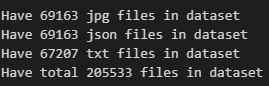

## syncronizar los archivos y cerrar la sesión

In [ ]:
drive.flush_and_unmount()

In [ ]:
from google.colab import runtime
runtime.unassign()